In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv('Results_4_FigS5-7-1.csv', sep=';')
train

,name,mode,c_t_as,c_t_bs,c_ua,a_sd,a_su,a_ua,ce_sh,ce_wi,...,b6b7s_r,b6b7s_l,b6b7s_u,b6b7s_d,b6b7s_ua,b6b7f_r,b6b7f_l,b6b7f_d,b6b7f_u,b6b7f_ua
0,hNaa10,7,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,hNaa20,7,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,hNaa40,7,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,hNaa50,7,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,hNaa60,7,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
5,hNaa80,7,0,0,1,1,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0


In [33]:
trainable_cols=["c_t_as","c_t_bs","c_ua","a_sd","a_su","a_ua","ce_sh","ce_wi","ce_ua","cms_sh","cms_wi",
                "cms_ua", "a2f_r", "a2f_l", "a2f_ua", "a2s_r", "a2s_l", "a2s_ua", "a1a2f_r", "a1a2f_l", 
                "a1a2f_d", "a1a2f_u", "a1a2f_ua", "b6b7s_r", "b6b7s_l", "b6b7s_u", "b6b7s_d", "b6b7s_ua",
                "b6b7f_r", "b6b7f_l", "b6b7f_d", "b6b7f_u", "b6b7f_ua"]

trainable_cols=["c_t_as","c_t_bs","c_ua","a_sd","a_su","a_ua","ce_sh","ce_wi","ce_ua","cms_sh","cms_wi",
                "cms_ua", "a2f_r", "a2f_l", "a2f_ua", "a2s_r", "a2s_l", "a2s_ua"]

grouped = train.groupby(["mode"])
grouped = grouped.apply(lambda x: x) 

df = grouped.reset_index(drop=True)
#df = grouped
train = df
df = df[trainable_cols] 
train

new_df = train.groupby(['mode']).get_group(7).reset_index()
new_df

df = new_df[trainable_cols] 

#train2 = grouped.apply(lambda x:x).reset_index(drop=True)
#train2

In [34]:
from sklearn.decomposition import PCA

pca=PCA(n_components=5)
X = pca.fit(df.values).transform(df.values)
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))
print(np.sum(pca.explained_variance_ratio_[0:3]))
print(df.shape)

PCA_components = pd.DataFrame(X)

train['PC1']=X[:,0]
train['PC2']=X[:,1]
train['PC3']=X[:,2]
train['PC4']=X[:,3]
train['PC5']=X[:,4]
print (pca.components_)
train.columns

explained variance ratio: [4.37974178e-01 3.14138775e-01 1.86097491e-01 6.17895562e-02
 4.85979488e-33]
0.938210443844889
(6, 18)
[[-4.80247699e-01  1.62314520e-01  3.17933179e-01  2.19377392e-17
   7.27845319e-35  0.00000000e+00  7.69694197e-02 -7.69694197e-02
   0.00000000e+00 -2.40963760e-01  2.40963760e-01  0.00000000e+00
  -4.80247699e-01  4.80247699e-01  0.00000000e+00 -1.26236412e-01
  -1.91696767e-01  0.00000000e+00]
 [ 1.37910121e-01 -2.54395202e-01  1.16485081e-01  1.25609341e-17
   4.16743813e-35  0.00000000e+00 -4.00095384e-01  4.00095384e-01
   0.00000000e+00 -5.16580465e-01  5.16580465e-01  0.00000000e+00
   1.37910121e-01 -1.37910121e-01  0.00000000e+00 -1.03013782e-01
  -1.34712992e-02  0.00000000e+00]
 [ 1.05801489e-01 -3.59987506e-01  2.54186017e-01  4.87808254e-17
   1.61843912e-34 -0.00000000e+00  2.13551288e-01 -2.13551288e-01
  -0.00000000e+00 -4.06347292e-02  4.06347292e-02 -0.00000000e+00
   1.05801489e-01 -1.05801489e-01 -0.00000000e+00  4.40974182e-01
  -6.951

Index(['name', 'mode', 'c_t_as', 'c_t_bs', 'c_ua', 'a_sd', 'a_su', 'a_ua',
       'ce_sh', 'ce_wi', 'ce_ua', 'cms_sh', 'cms_wi', 'cms_ua', 'a2f_r',
       'a2f_l', 'a2f_ua', 'a2s_r', 'a2s_l', 'a2s_ua', 'a1a2f_r', 'a1a2f_l',
       'a1a2f_d', 'a1a2f_u', 'a1a2f_ua', 'b6b7s_r', 'b6b7s_l', 'b6b7s_u',
       'b6b7s_d', 'b6b7s_ua', 'b6b7f_r', 'b6b7f_l', 'b6b7f_d', 'b6b7f_u',
       'b6b7f_ua', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
      dtype='object')

In [14]:
# train['PC1']=X[:,0]
# train['PC2']=X[:,1]
# train['PC3']=X[:,2]
# train['PC4']=X[:,3]
# train['PC5']=X[:,4]
# train

,name,c_t_as,c_t_bs,c_ua,a_sd,a_su,a_ua,ce_sh,ce_wi,ce_ua,...,b6b7f_r,b6b7f_l,b6b7f_d,b6b7f_u,b6b7f_ua,PC1,PC2,PC3,PC4,PC5
0,hNaa10,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,-1.605710,0.197342,-0.049938,0.130329,-0.174781
1,hNaa20,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,-0.289723,1.549027,0.241023,0.352949,0.004241
2,hNaa40,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0.609536,1.087454,-1.157864,0.130606,-0.399250
3,hNaa50,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,-0.211229,1.214557,0.542813,0.523755,0.202188
4,hNaa60,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,-0.289723,1.549027,0.241023,0.352949,0.004241
5,hNaa80,0,0,1,1,0,0,1,0,0,...,0,1,1,0,0,0.199216,-0.357935,-0.586030,1.247481,-0.890358
6,hNaa10,0,1,0,0,1,1,1,0,0,...,1,0,0,0,0,1.620686,-0.186537,-0.478409,-0.441818,0.615676
7,hNaa20,0,1,0,0,1,0,0,1,0,...,0,1,1,0,0,-1.026376,-0.782912,-1.011894,-0.192523,0.973076
8,hNaa40,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,-0.103310,1.482525,-0.875624,0.034491,0.339594
9,hNaa50,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1.397332,-0.038480,-0.595092,0.017879,0.839972


<Figure size 432x288 with 0 Axes>

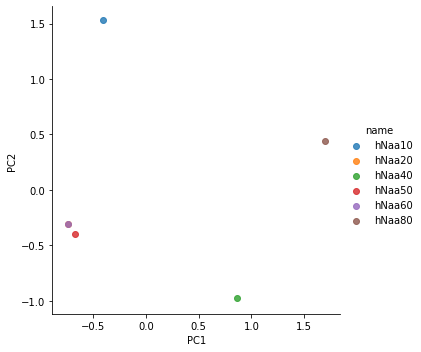

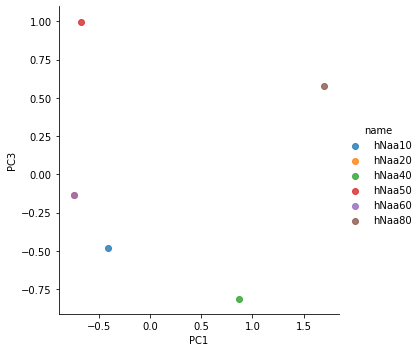

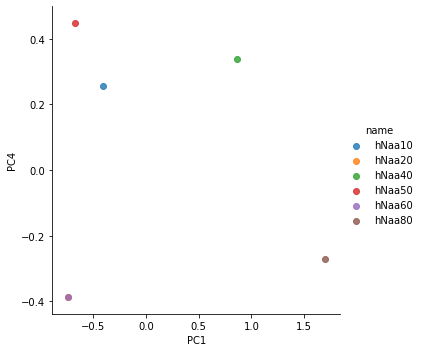

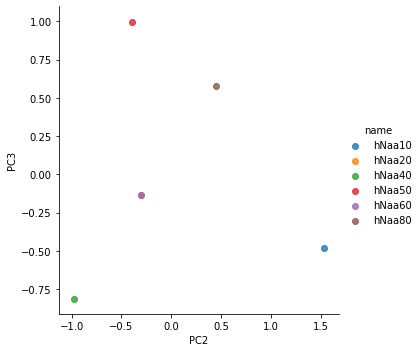

In [35]:
plt.clf()
sns.lmplot(x='PC1',y='PC2',hue='name',data=train,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC3',hue='name',data=train,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC4',hue='name',data=train,fit_reg=False)
plt.show()
sns.lmplot(x='PC2',y='PC3',hue='name',data=train,fit_reg=False)
plt.show()

In [36]:
from sklearn.cluster import KMeans
# Create a KMeans instance with k clusters: model
model = KMeans(n_clusters=2)

# Fit model to samples
model.fit(PCA_components.iloc[:,:2])

# Append the inertia to the list of inertias
# inertias.append(model.inertia_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
print(model.labels_)

[1 1 0 1 1 0]


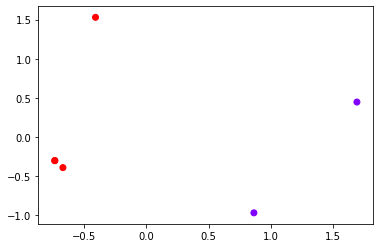

In [38]:
plt.scatter(PCA_components.to_numpy()[:,0],PCA_components.to_numpy()[:,1], c=model.labels_, cmap='rainbow')